# 토픽모델링 (LDA)
- ### 빅카인즈 뉴스기사 데이터 활용
    - #### https://www.bigkinds.or.kr/

In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 4.9MB/s 
     |████████████████████████████████| 174kB 51.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/0e/2b/e8/c0b818ac4b3d35104d35e48cdc7afe27fc06ea277feed2831a
Successfully built JPype1


In [1]:
import konlpy
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from konlpy.tag import Twitter

In [2]:
!wget https://bit.ly/2QA9xhg -O news_1500.xlsx

--15:23:36--  https://bit.ly/2QA9xhg
           => `news_1500.xlsx'
Resolving bit.ly... 67.199.248.10, 67.199.248.11
Connecting to bit.ly|67.199.248.10|:443... connected.
ERROR: Certificate verification error for bit.ly: unable to get local issuer certificate
To connect to bit.ly insecurely, use `--no-check-certificate'.
Unable to establish SSL connection.


### 데이터(뉴스 기사) 읽기

In [3]:
df_train = pd.read_excel('news_1500.xlsx', names=['기사'], delimiter='\t', keep_default_na=False)

In [8]:
df_train[:5]

,기사
0,호주 브리즈번에서 발생한 한국인 워킹홀리데이 참가자 살해범이 같은 한국인 것으로 드...
1,호주 경찰이 한국인 워킹홀리데이 참가자를 살해한 혐의로 또 다른 한국인 남성을 기소...
2,\n \n호주 괴물 가재가 공개돼 네티즌들의 폭발적인 관심을 끌고 있다. \n ...
3,최근 인기를 끌고 있는 tvN의 드라마 ‘응답하라 1994’가 같은 장면을 내보내고...
4,호주 워킹홀리데이 한국인 참가자가 19일 또다시 숨진 채 발견됐다. 지난달 호주에서...


In [5]:
df_train.shape

(1499, 1)

- #### Countvectorizer적용을 위해 list로 변환

In [2]:
#Countvectorizer적용을 위해 list로 변환

list_train = df_train['기사'].tolist()

In [6]:
len(list_train)

1499

In [7]:
list_train[:5]

['호주 브리즈번에서 발생한 한국인 워킹홀리데이 참가자 살해범이 같은 한국인 것으로 드라나 충격을 주고 있다. \n \n20일 호주 국영 ABC방송은 퀸즐랜드주 경찰이 김모(28)씨를 살해하고 암매장한 혐의로\xa0한국인 홍모(28)씨를\xa0체포했다고 보도했다. \n \n경찰에 따르면 홍씨는\xa0지난 16일 오후 브리즈번 캐넌힐에서 1만 5000 호주달러를 원화로 환전해줄 사..',
 '호주 경찰이 한국인 워킹홀리데이 참가자를 살해한 혐의로 또 다른 한국인 남성을 기소했다고 호주 언론이 보도했다. \n \n퀸즐랜드주 경찰은 20일(현지시간) 금품을 빼앗기 위해 김민태(28)씨를 살해한 혐의로 황모(28)씨를 기소했다고 시드니모닝헤럴드가 보도했다. \n \n그는 이날 브리즈번 법원에서 열린 심리에 출석해 기자들로부터 고개를 돌린 채 아래쪽만 쳐..',
 '\xa0 \n \n호주 괴물 가재가 공개돼 네티즌들의 폭발적인 관심을 끌고 있다. \n \n최근 각종 온라인 커뮤니티 게시판에는 ‘호주 괴물 가재’라는 제목의 사진 한 장이 게재됐다. \n \n공개된 사진에는 웬만한 성인 남성 팔 크기와 비슷한 가재의 모습이 담겨 있다. 사진 속 남성도 가재가 무거운지 엉거주춤한 자세를 취하고 있다. 호주에서 잡힌 것으로 알려진 가재의..',
 '최근 인기를 끌고 있는 tvN의 드라마 ‘응답하라 1994’가 같은 장면을 내보내고 다른 프로그램의 화면이 나오는 등 방송사고를 냈다. \n▶ 방송사고 이후 사과 자막이 나오는 tvN ‘응답하라 1994’의 한 장면.20일 밤 10시쯤 드라마 ‘응답하라 1994’가 방송되는 도중에 방송사고가 발생했다. 이날 방송에서 성나정이 호주로 떠났다가 한국으로 돌아..',
 '호주 워킹홀리데이 한국인 참가자가 19일 또다시 숨진 채 발견됐다. 지난달 호주에서 한국인 여대생이 무참히 살해된 지 한 달도 지나지 않아 발생한 이번 사건으로 호주 교민사회 및 어학연수 희망자들의 불안감이 커지고 있다. \n \n호주 ABC방송 등에 따르면 퀸즐랜드주 

### 형태소 분석

In [9]:
twitter = Twitter()

C:\Users\ojkwon\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\Users\ojkwon\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [10]:
results = []
for line in list_train:
    word_list = twitter.pos(line, norm=True, stem=True)
    
    words = []
    for word in word_list:
        if not word[1] in ["Josa", "eomi", "Punctuation", "Verb"]:
            words.append(word[0])
            
    words = (" ".join(words)).strip()
    
    results.append(words)

In [12]:
results[:5]

['호주 브리즈번 발생 한국인 워킹홀리데이 참가자 살해 범 같다 한국인 것 드라 충격 있다 20일 호주 국영 ABC 방송 퀸즐랜드 주 경찰 김모 28 씨 살해 암매장 혐의 \xa0 한국인 홍모 28 씨 \xa0 체포 보도 경찰 홍씨 \xa0 지난 16일 오후 브리즈번 캐넌 힐 1만 5000 호주달러 원화로 환전 사',
 '호주 경찰 한국인 워킹홀리데이 참가자 살해 혐의 또 다른 한국인 남성 기소 호주 언론 보도 퀸즐랜드 주 경찰 20일 현지 시간 금품 위해 김민 태 28 씨 살해 혐의 황모 28 씨 기소 시드니 모닝 헤럴드 보도 그 이 날 브리즈번 법원 심리 출석 기자 들 로부터 고개 채 아래쪽',
 '호주 괴물 가재 공개 네티즌 들 폭발 적 관심 끌 있다 최근 각종 온라인 커뮤니티 게시판 ‘ 호주 괴물 가재 제목 사진 장이 게재 공개 사진 웬만하다 성인 남성 팔 크기 비슷하다 가재 모습 있다 사진 속 남성 가재 무겁다 엉거주춤 자세 취하 있다 호주 것 가재',
 '최근 인기 끌 있다 tvN 의 드라마 ‘ 응답 하 1994 같다 장면 다른 프로그램 화면 등 방송사고 ▶ 방송사고 이후 사과 자막 tvN ‘ 응답 하 1994 의 장면 20일 밤 10시 쯤 드라마 ‘ 응답 하 1994 방송 도중 방송사고 발생 이 날 방송 정이 호주 한국',
 '호주 워킹홀리데이 한국인 참가자 19일 또다시 채 발견 지난달 호주 한국인 여대생 무참 히 살해 달도 발생 이번 사건 호주 교민 사회 및 어학 연수 희망 자 들 불안감 있다 호주 ABC 방송 등 퀸즐랜드 주 경찰 이 날 브리즈번 남 서부 앨 지스 터 주택 뒷마당 발견 변 사체 사흘 전 행방 불']

### 문서-단어 벡터 생성
- 단어(특징) 벡터 수 : 1,000
- max_df : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
    - 단어장에 포함되기 위한 최대 빈도
- min_df : 정수 또는 [0.0, 1.0] 사이의 실수. 디폴트 1
    - 단어장에 포함되기 위한 최소 빈도

In [13]:
vect = CountVectorizer(max_features=10000, max_df=.10)
X = vect.fit_transform(results)

## 토픽 분류 
- ### 토픽 수 : 10개

In [14]:
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)

In [15]:
lda.components_.shape

(10, 10000)

In [16]:
lda.components_

array([[0.1       , 0.1       , 1.10000029, ..., 0.1       , 0.1       ,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 1.09999986, 0.1       ,
        0.1       ],
       [0.1       , 1.10000037, 0.1       , ..., 0.10002018, 0.1       ,
        0.1       ],
       ...,
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [2.09996326, 1.09999963, 0.1       , ..., 2.09986036, 0.1       ,
        0.1       ],
       [0.1       , 0.1       , 1.09999971, ..., 0.1       , 0.1       ,
        0.1       ]])

### 토픽마다(components_의 행) 특성을 오름차순으로 정렬
- #### 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꾼다

### argsort()
- 작은 값부터 순서대로 데이터의 index를 반환

###  Extended Slices 
- #### arr[A:B:C]의 의미
    - index A 부터 index B 까지, C의 간격으로 배열을 만들어준다

In [17]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬합니다
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꿉니다

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

In [18]:
sorting

array([[4166, 6205, 5187, ..., 6066, 5206, 8109],
       [4339, 9353, 7862, ..., 5982, 5206, 8109],
       [2554, 4573, 4202, ..., 5982, 6066, 8109],
       ...,
       [2499, 2554, 4655, ..., 6066, 5206, 8109],
       [3471, 3823, 2499, ..., 6066, 5206, 8109],
       [5945, 8843, 6884, ..., 5982, 6066, 5206]], dtype=int64)

### CountVectorizer 객체에서 특성 이름

In [19]:
# CountVectorizer 객체에서 특성 이름을 구합니다.

feature_names = np.array(vect.get_feature_names())

In [21]:
feature_names.shape

(10000,)

In [20]:
feature_names

array(['00', '000만', '02', ..., '힘들다', '힙합댄스', '兩會'], dtype='<U16')

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

### 10개의 토픽을 출력

#### .format(*these_topics)
- 값들이 table에 들어 있다

#### sorting[these_topics, i]
- 각 topic 별 특징들의 index (높은 순으로)

#### 예외 처리
- 먼저, try 절 (try 와 except 사이의 문장들) 이 실행
- 예외가 발생하지 않으면, except 절을 건너뛰고 try 문의 실행은 종료
- try 절을 실행하는 동안 예외가 발생하면, 
    - 절의 남은 부분들을 건너뛴다
    - 그런 다음 형이 except 키워드 뒤에 오는 예외 이름과 매치되면, 그 except 절이 실행되고
    - 그런 다음 실행은 try 문 뒤로 이어 수행
- except 절에 있는 예외 이름들과 매치되지 않는 예외가 발생하면, 
    - 외부에 있는 try 문으로 전달된다.
    - 처리기가 발견되지 않으면, 처리되지 않은 예외이고, Error 메시지를 출력하고 실행이 멈춘다.

#### pass 문
- 아무것도 하지 않는다.
- 문법적으로 문장이 필요하지만, 프로그램이 특별히 할 일이 없을 때 사용

In [23]:
def print_topics(topics, feature_names, sorting, topics_per_chunk=6, n_words=20):
    
    for i in range(0, len(topics), topics_per_chunk):
        
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")

In [24]:
print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
박태환           보도            국제            리그            올림픽           
올림픽           필리핀           사드            포켓몬           경기            
수영            지역            발표            축구            대표팀           
출전            통해            개최            acl           예선            
리우            결과            내년            감독            대회            
국가대표          정부            독도            게임            시드니           
27            같다            평화            시즌            오후            
정부            발견            위성            해밍턴           2016          
선수            조사            소녀            지난해           출전            
대학            방송            기업            전북            리우            


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
축구  

### (분석) 토픽의 수(10개)를 적게 하여, 각 토픽이 포함하고 있는 주제가 다양하게 분포한다.

## 100개 토픽 학습

In [26]:
# 100개 토픽 학습
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

#### 100개 중 임의의 일부(10개)만 출력

In [27]:
topics = np.array([7, 16, 24, 41, 45, 51, 54, 81, 89, 97])

In [28]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 7       topic 16      topic 24      topic 41      topic 45      
--------      --------      --------      --------      --------      
엘니뇨           위해            사이트           태풍            리그            
피해자           페이스북          경쟁            이름            전북            
옥스팜           남중국해          이행            의미            축구            
보고서           보도            도박            손흥민           연맹            
wff           커플            수준            독일            acl           
노예            합동            포트            지역            챔피언스리그        
2013          순찰            발표            매장            클래식           
트러블메이커        인도            국가            물이            현대            
가장            방송            서울대           게시            서울            
항공            올해            등급            말레이시아         시즌            


topic 51      topic 54      topic 81      topic 89      topic 97      
--------      --------      --------      --------      --------      
브라질 

#### (분석) 토픽 45, 54은 각각 축구, 자유무역으로 특정할 수 있는 단어들만 추출된 것을 볼 수 있다. 
#### 선정된 단어들의 의미를 파악하면 토픽을 더 명확하게 정의할 수 있다. 

## 토픽에 할당된 문서를 통해 단어 의미 파악

In [30]:
# 골프 관련 토픽 89를 가중치로 정렬합니다

golf = np.argsort(document_topics100[:, 89])[::-1]

In [31]:
# 이 토픽이 가장 비중이 큰 문서 다섯개를 출력합니다

for i in golf[:2]:      # 첫 두 문장을 출력합니다
        print(list_train[i], "\n")

세계유산도시 시장과 전문가들이 경북 경주에 총 집결했다. 
 
6일 경주시에 따르면 5일부터 7일까지 3일간 경주 하이코 등에서 ‘제2차 세계유산도시기구 아 태지역 총회’를 개최한다. 
 
이번 총회에는 일본 교토시를 비롯해 14개국 35여개 세계유산도시 시장단과 세계유산 전문가들이 대거 참가했다. 
 
또 세계유산도시기구(OWHC), 유네스코 방콕사무.. 

“오늘(8월8일) 이후 우리는 지구에 빚을 지게 된다.” 
 
자연에 치유 기간을 주지 않고 생태자원을 무분별하게 써버리면 지구는 점점 재생 능력을 잃고 황폐하게 된다. 국제환경단체 지구생태발자국네트워크(GFN)는 이 균형을 맞추기 위해 인간이 일년치 생태자원을 모두 써버린 날을 의미하는 ‘지구용량 초과의 날’(Earth Overshoot Day)을 매.. 



## CoLab에서 한글 설치

In [15]:
#한글 설치
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*

import matplotlib
matplotlib.font_manager._rebuild()


'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'fc-cache'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'cp'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


## 한글 폰트 설정 (윈도우, 맥, 리눅스)

In [32]:
import platform
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt
import matplotlib

if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('system error...')

## 시각화
- ### 주제 명 : 각 주제에 할당된 상위 두 개 단어로 설정
- ### 주제별로 가중치를 시각화

#### set_yticklabels(..., ha="left", va="top")
- ha : horizontalalignment
- va : verticalalignment

#### invert_yaxis()
- y축의 값이 작을수록 위로 위치하도록 만든다.

#### set_tick_params(pad=130)
- Distance in points between tick and label

#### tight_layout()  
- plot간의 간격을 자동으로 맞춰준다.

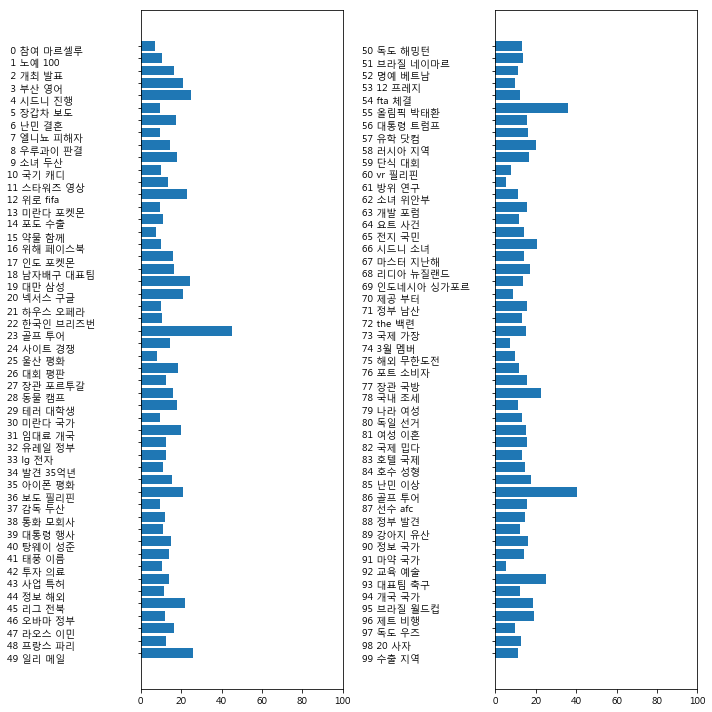

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

# 두 개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 100)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

### (분석) 
- #### LDA 분석으로 얻은 결과는 주제를 구별하는데 도움을 주지만
- #### 비지도 학습이기 때문에 완벽한 정답은 아니다. 
- #### 주제에 할당된 문서를 확인하여 평가하고 검증하는 과정은 사람이 해주어야 한다.